In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [13]:
nRowsRead = 1000
df1 = pd.read_csv('allo-doc-PHCS_2017.csv', delimiter=',', na_values='NA', nrows=nRowsRead)
df1.dataframeName = 'allo-doc-PHCS_2017.csv'
df1 = df1[df1['State/ UT'] != 'All India/ Total']
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 36 rows and 10 columns


In [15]:
print(df1.head(5))

  S. No.          State/ UT  Required - [R]  Sanctioned - [S]  \
0      1     Andhra Pradesh            1147            1952.0   
1      2  Arunachal Pradesh             143               NaN   
2      3              Assam            1014               NaN   
3      4              Bihar            1899            2078.0   
4      5       Chhattisgarh             785             798.0   

   In Position - [P]  Vacant - [S-P]  Shortfall - [R-P] Note of State/ UT  \
0               1644           308.0                NaN               NaN   
1                122             NaN               21.0               NaN   
2               1048             NaN                NaN               NaN   
3               1786           292.0              113.0                 #   
4                341           457.0              444.0               NaN   

  Note of Vacant - [S-P] Note of Shortfall - [R-P]  
0                    NaN                         *  
1                    NaN                

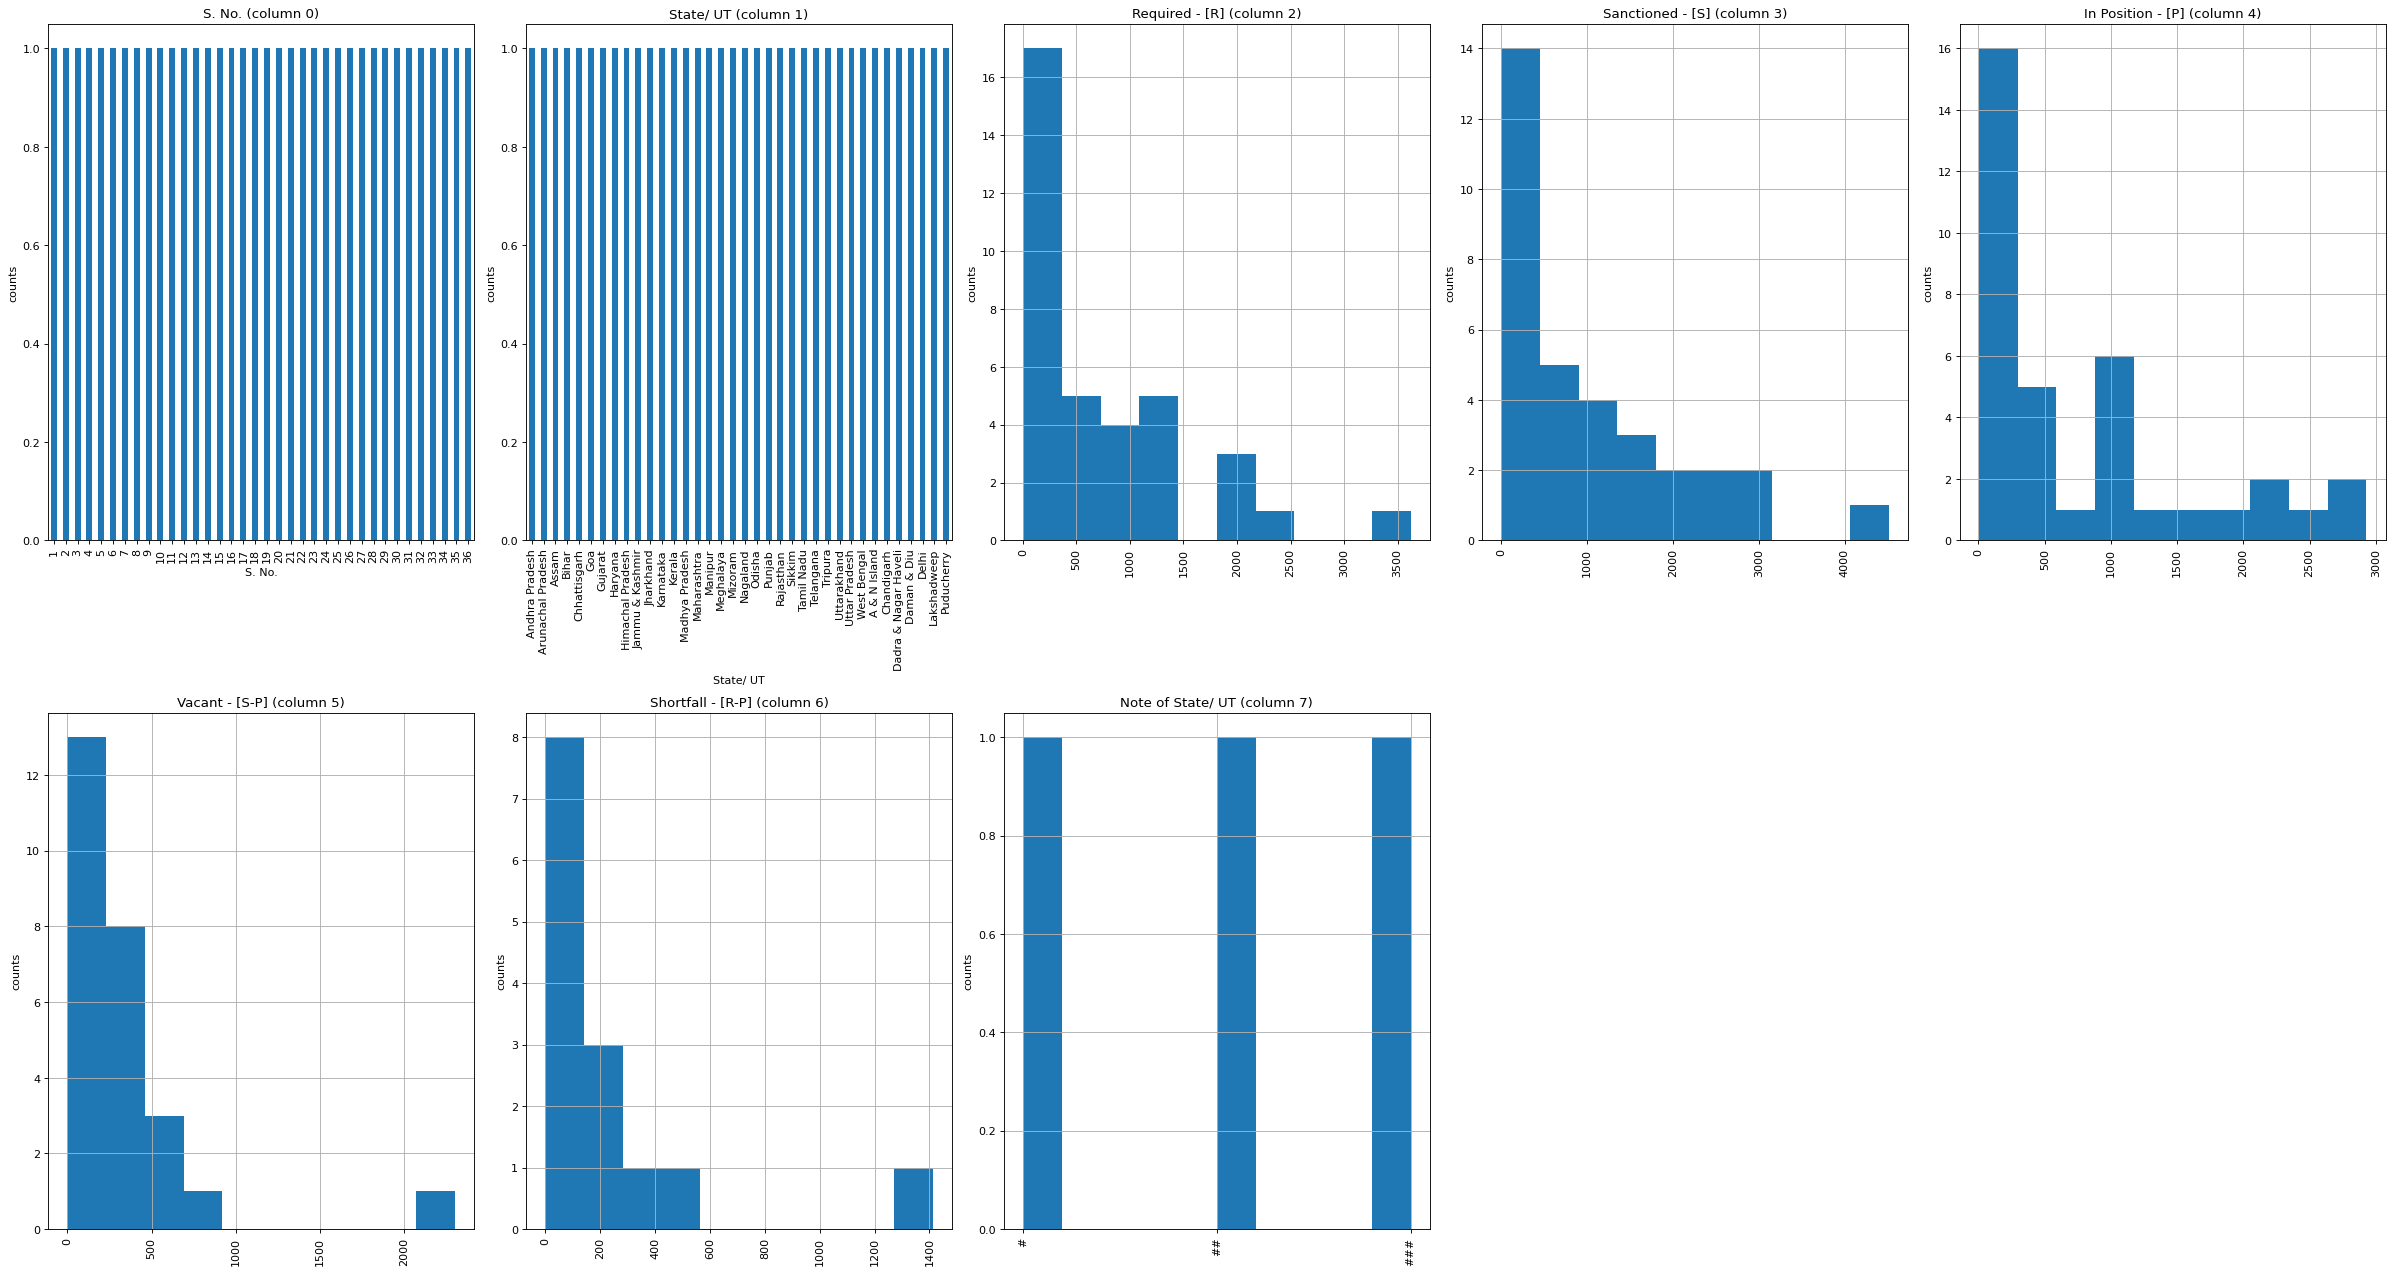

In [16]:
nunique = df1.nunique()
df_dist = df1[[col for col in df1 if nunique[col] > 1 and nunique[col] < 50]]
nRow, nCol = df_dist.shape
columnNames = list(df_dist)
nGraphPerRow = 5
nGraphShown = 10
nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
for i in range(min(nCol, nGraphShown)):
    plt.subplot(nGraphRow, nGraphPerRow, i + 1)
    columnDf = df_dist.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation=90)
    plt.title(f'{columnNames[i]} (column {i})')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.savefig('distribution_plot_doctors.png')
plt.show()

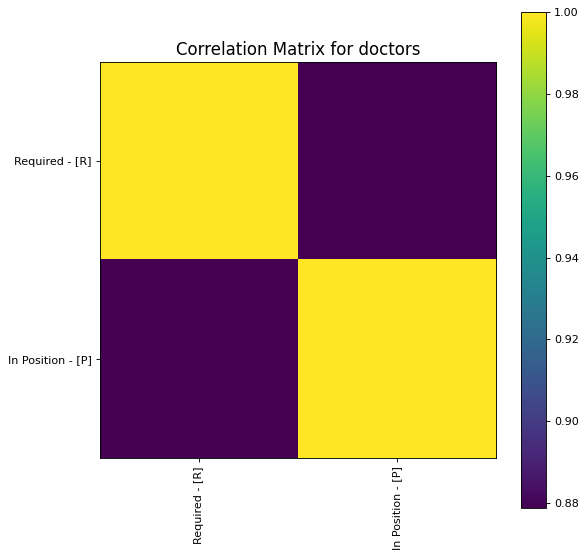

In [17]:
# Select only numeric columns for correlation
df_corr = df1.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
df_corr = df_corr[[col for col in df_corr if df_corr[col].nunique() > 1]]
if df_corr.shape[1] >= 2:
    corr = df_corr.corr()
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for doctors', fontsize=15)
    plt.savefig('correlation_plot_doctors.png')
    plt.show()
else:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_corr.shape[1]}) is less than 2')

In [18]:
nRowsRead = 1000
df2 = pd.read_csv('nursing-staff-PHCS-CHCS_2017.csv', delimiter=',', na_values='NA', nrows=nRowsRead)
df2.dataframeName = 'nursing-staff-PHCS-CHCS_2017.csv'
# Exclude 'All India/ Total' row early
df2 = df2[df2['State/ UT'] != 'All India/ Total']
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 36 rows and 10 columns


In [19]:
print(df2.head(5))

  S. No.          State/ UT  Required - [R]  Sanctioned - [S]  \
0      1     Andhra Pradesh            2498            4307.0   
1      2  Arunachal Pradesh             584               NaN   
2      3              Assam            2120            2798.0   
3      4              Bihar            2949            1662.0   
4      5       Chhattisgarh            1968            2685.0   

   In Position - [P]  Vacant - [S-P]  Shortfall - [R-P] Note of State/ UT  \
0               3541           766.0                NaN               NaN   
1                498             NaN               86.0               NaN   
2               2793             5.0                NaN                 #   
3               1142           520.0             1807.0                ##   
4               1918           767.0               50.0               NaN   

  Note of Vacant - [S-P] Note of Shortfall - [R-P]  
0                    NaN                         *  
1                    NaN                

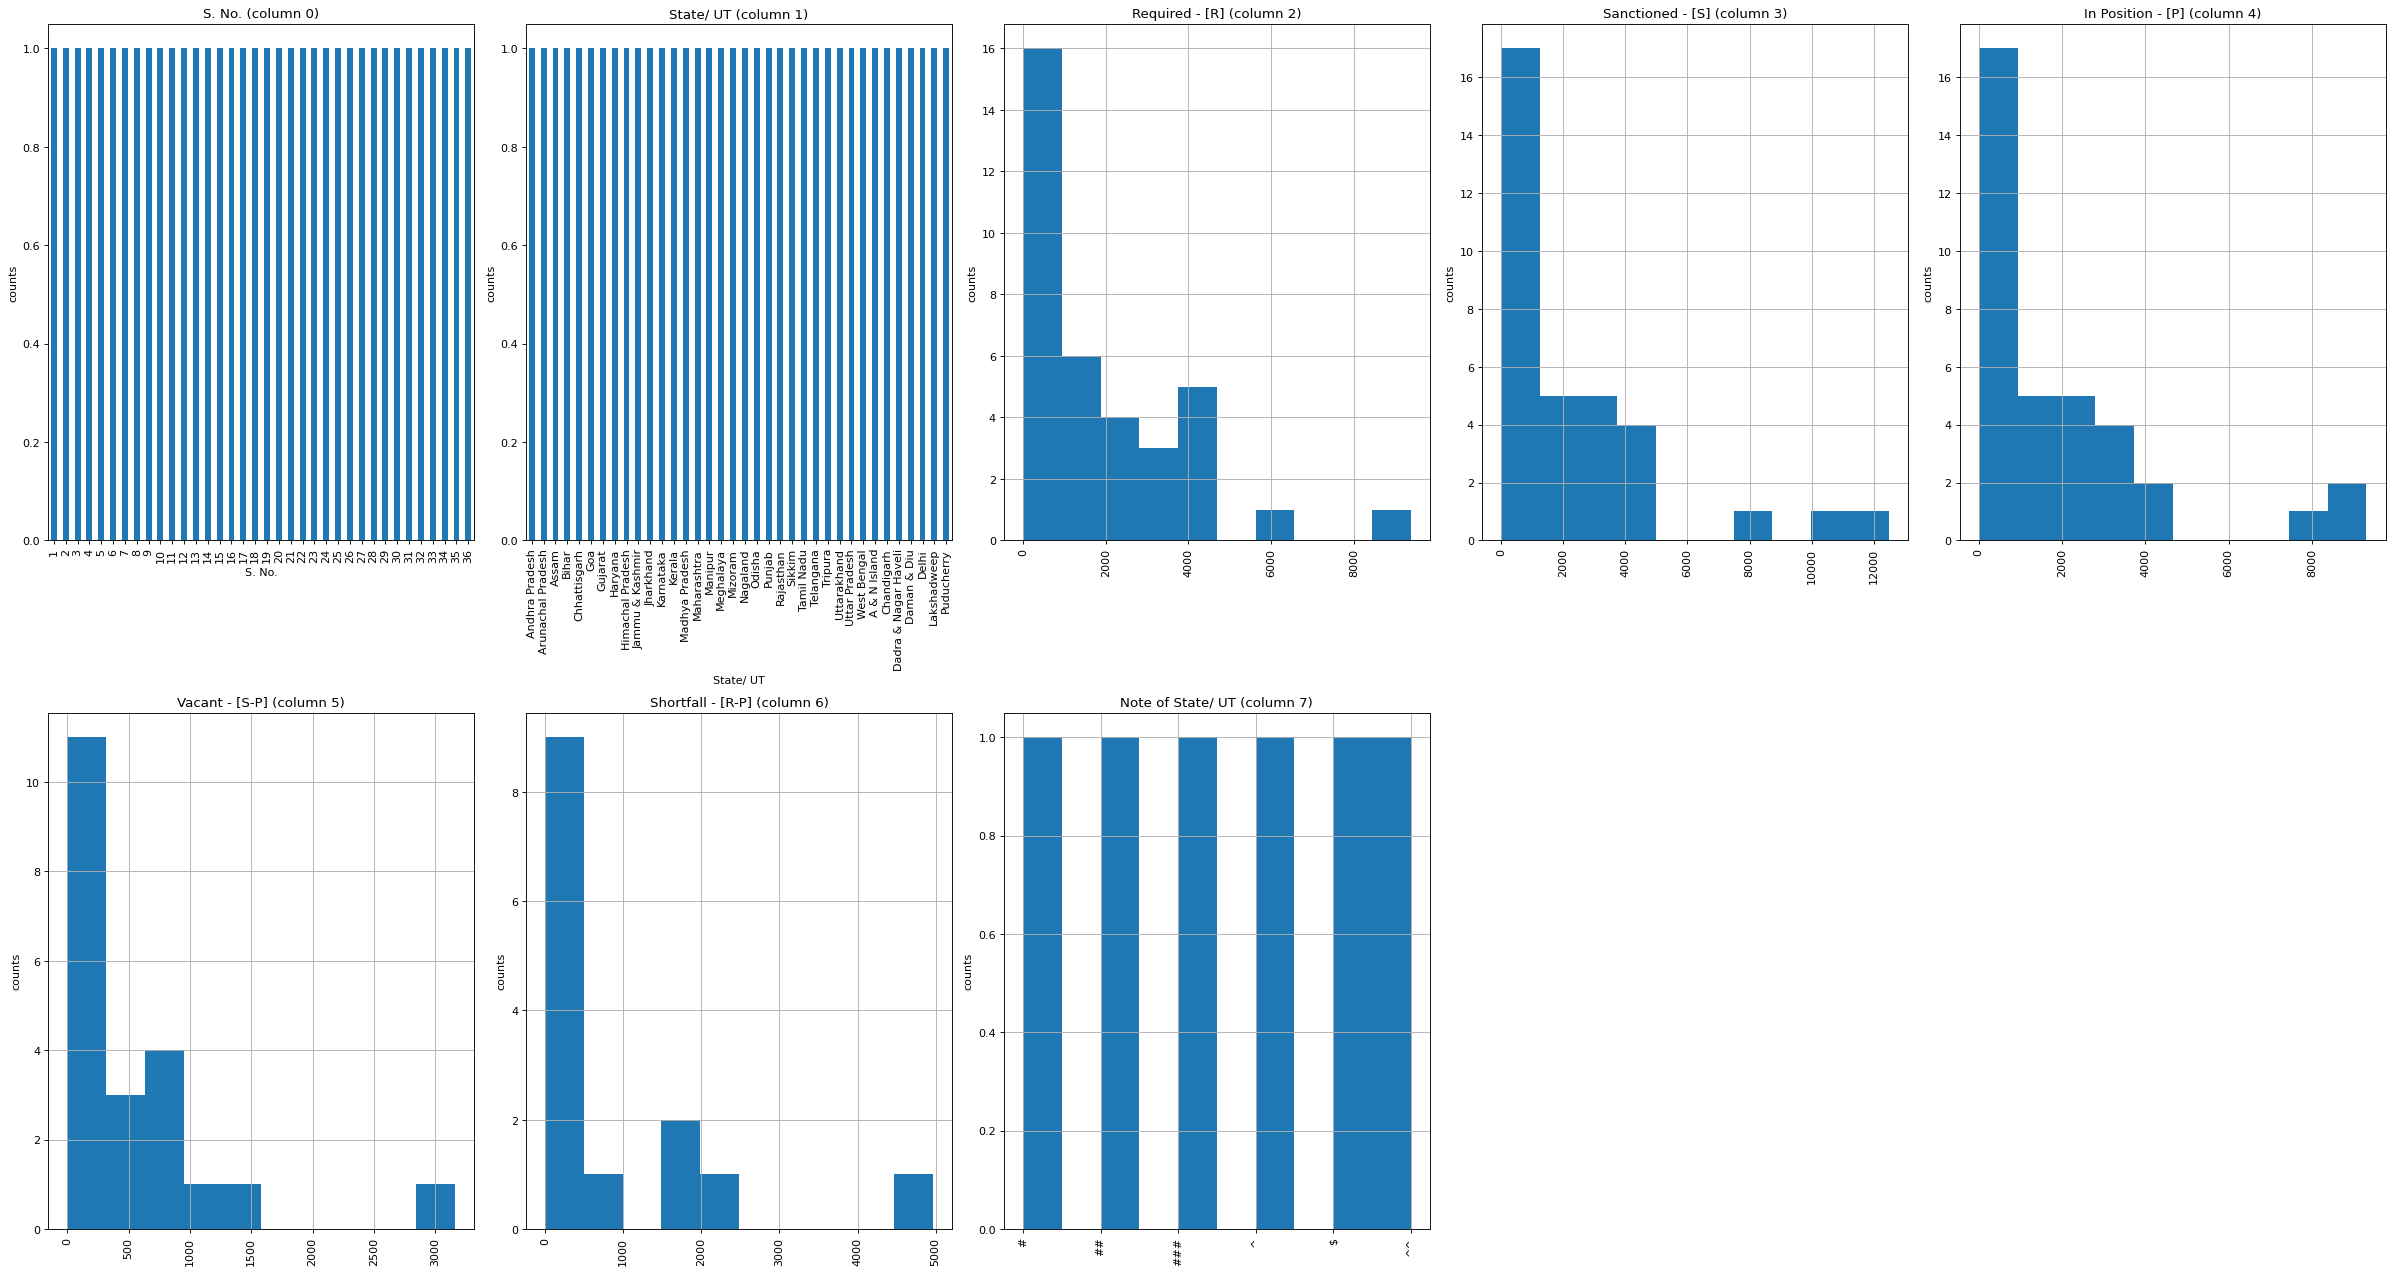

In [20]:
nunique = df2.nunique()
df_dist = df2[[col for col in df2 if nunique[col] > 1 and nunique[col] < 50]]
nRow, nCol = df_dist.shape
columnNames = list(df_dist)
nGraphPerRow = 5
nGraphShown = 10
nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
for i in range(min(nCol, nGraphShown)):
    plt.subplot(nGraphRow, nGraphPerRow, i + 1)
    columnDf = df_dist.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation=90)
    plt.title(f'{columnNames[i]} (column {i})')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.savefig('distribution_plot_nurses.png')
plt.show()

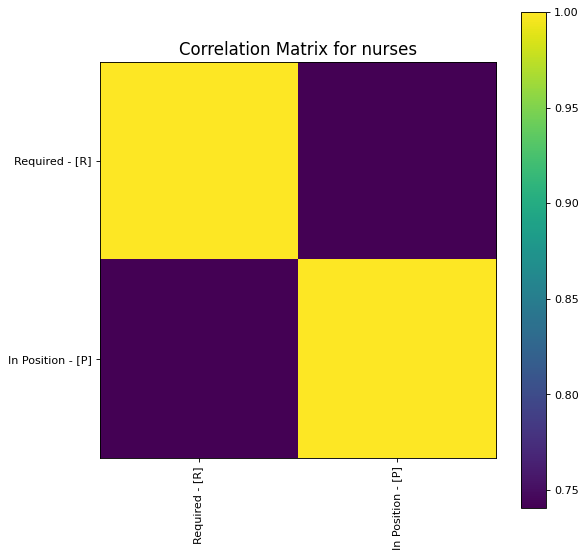

In [21]:
# Select only numeric columns for correlation
df_corr = df2.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
df_corr = df_corr[[col for col in df_corr if df_corr[col].nunique() > 1]]
if df_corr.shape[1] >= 2:
    corr = df_corr.corr()
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for nurses', fontsize=15)
    plt.savefig('correlation_plot_nurses.png')
    plt.show()
else:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_corr.shape[1]}) is less than 2')

In [28]:
df3 = pd.read_csv('surgeons-CHCS_2017.csv', delimiter=',', na_values='NA', nrows=nRowsRead)
df3.dataframeName = 'surgeons-CHCS_2017.csv'
df3 = df3[df3['State/ UT'] != 'All India/ Total']
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')
print(df3.head(5))

There are 36 rows and 9 columns
  S. No.          State/ UT  Required - [R]  Sanctioned - [S]  \
0      1     Andhra Pradesh             193              31.0   
1      2  Arunachal Pradesh              63               NaN   
2      3              Assam             158               NaN   
3      4              Bihar             150               NaN   
4      5       Chhattisgarh             169             155.0   

   In Position - [P]  Vacant - [S-P]  Shortfall - [R-P] Note of State/ UT  \
0                 38             NaN                155               NaN   
1                  0             NaN                 63               NaN   
2                 12             NaN                146               NaN   
3                 13             NaN                137               NaN   
4                 15           140.0                154               NaN   

  Note of Vacant - [S-P]  
0                      *  
1                    NaN  
2                    NaN  
3     

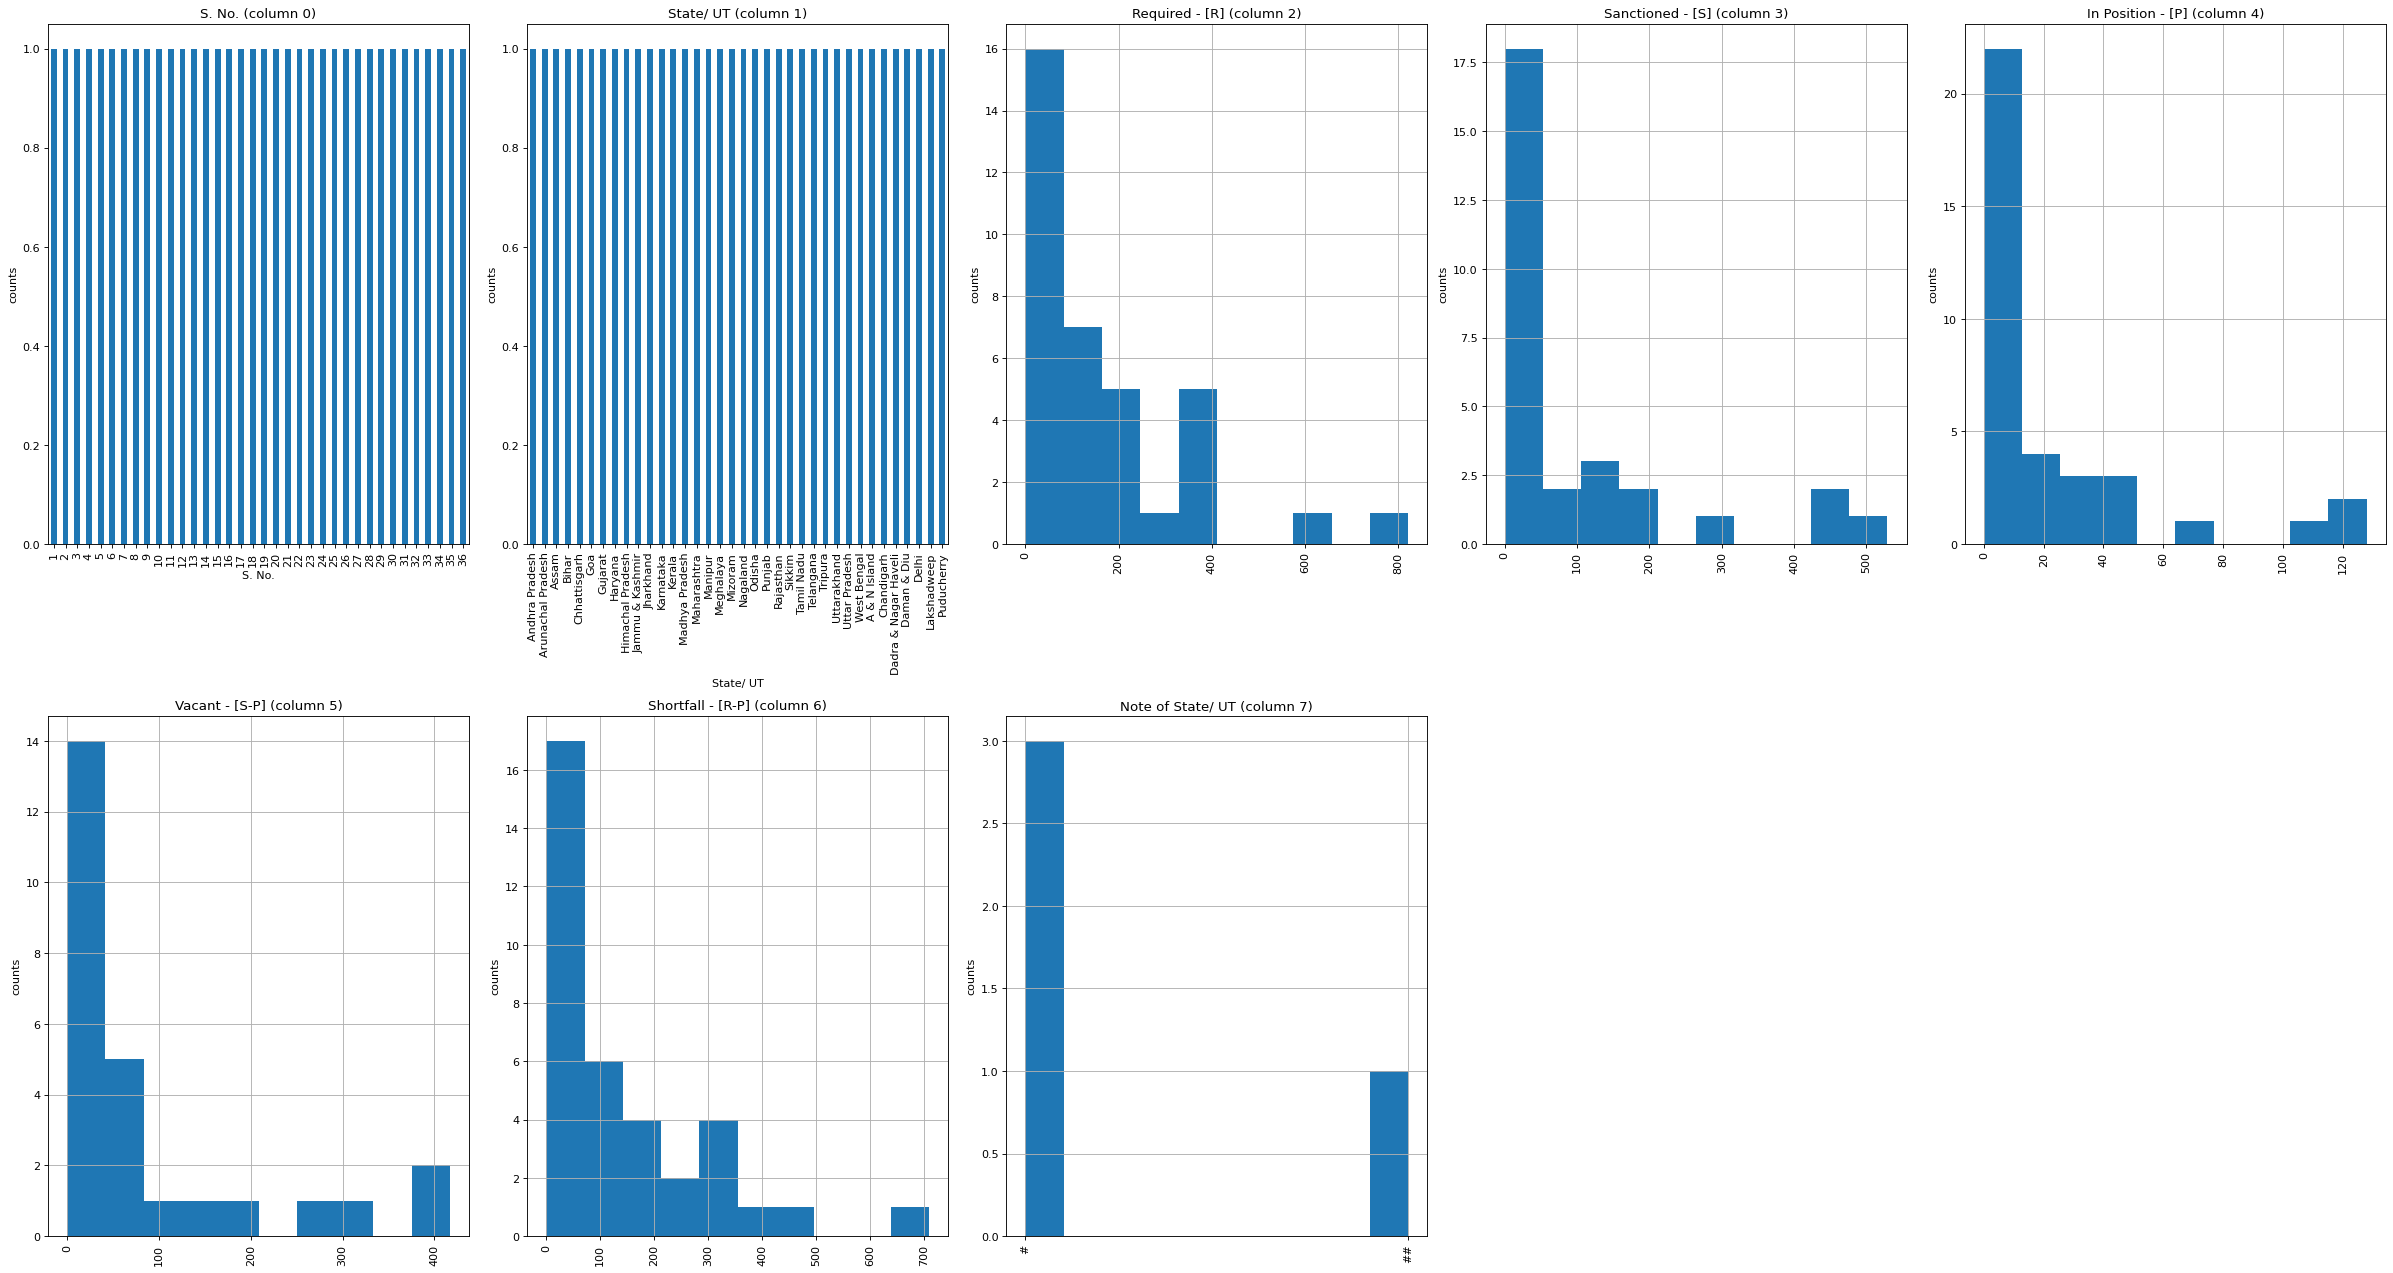

In [29]:
nunique = df3.nunique()
df_dist = df3[[col for col in df3 if nunique[col] > 1 and nunique[col] < 50]]
nRow, nCol = df_dist.shape
columnNames = list(df_dist)
nGraphPerRow = 5
nGraphShown = 10
nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
for i in range(min(nCol, nGraphShown)):
    plt.subplot(nGraphRow, nGraphPerRow, i + 1)
    columnDf = df_dist.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation=90)
    plt.title(f'{columnNames[i]} (column {i})')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.savefig('distribution_plot_surgeons.png')
plt.show()

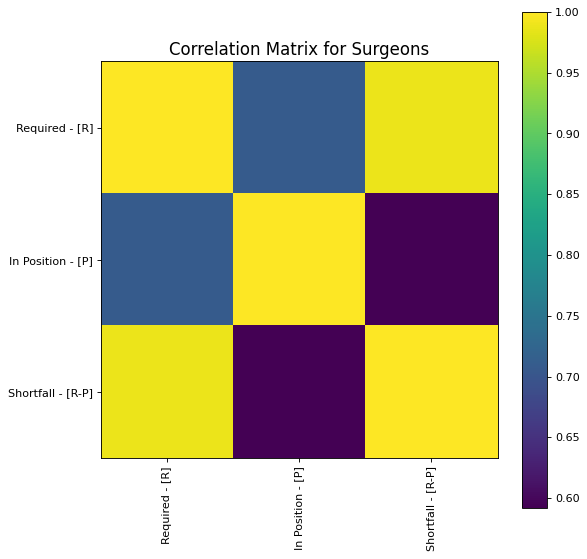

In [30]:
df_corr = df3.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
df_corr = df_corr[[col for col in df_corr if df_corr[col].nunique() > 1]]
if df_corr.shape[1] >= 2:
    corr = df_corr.corr()
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for Surgeons', fontsize=15)
    plt.savefig('correlation_plot_surgeons.png')
    plt.show()
else:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_corr.shape[1]}) is less than 2')

In [31]:
df4 = pd.read_csv('rural-area-covered-centre_2017.csv', delimiter=',', na_values='NA', nrows=nRowsRead)
df4.dataframeName = 'rural-area-covered-centre_2017.csv'
df4 = df4[df4['State/ UT'] != 'All India']
nRow, nCol = df4.shape
print(f'There are {nRow} rows and {nCol} columns')
print(df4.head(5))

There are 36 rows and 8 columns
  S. No.          State/ UT  \
0      1     Andhra Pradesh   
1      2  Arunachal Pradesh   
2      3              Assam   
3      4              Bihar   
4      5       Chhattisgarh   

   Average Rural Area [Sq. Km.] covered by a sub Centre  \
0                                              21.30      
1                                                NaN      
2                                               6.84      
3                                               9.23      
4                                              25.44      

   Average Rural Area [Sq. Km.] covered by a PHC  \
0                                         138.50   
1                                            NaN   
2                                          31.17   
3                                          48.36   
4                                         168.08   

   Average Rural Area [Sq. Km.] covered by a CHC  \
0                                         823.09   
1        

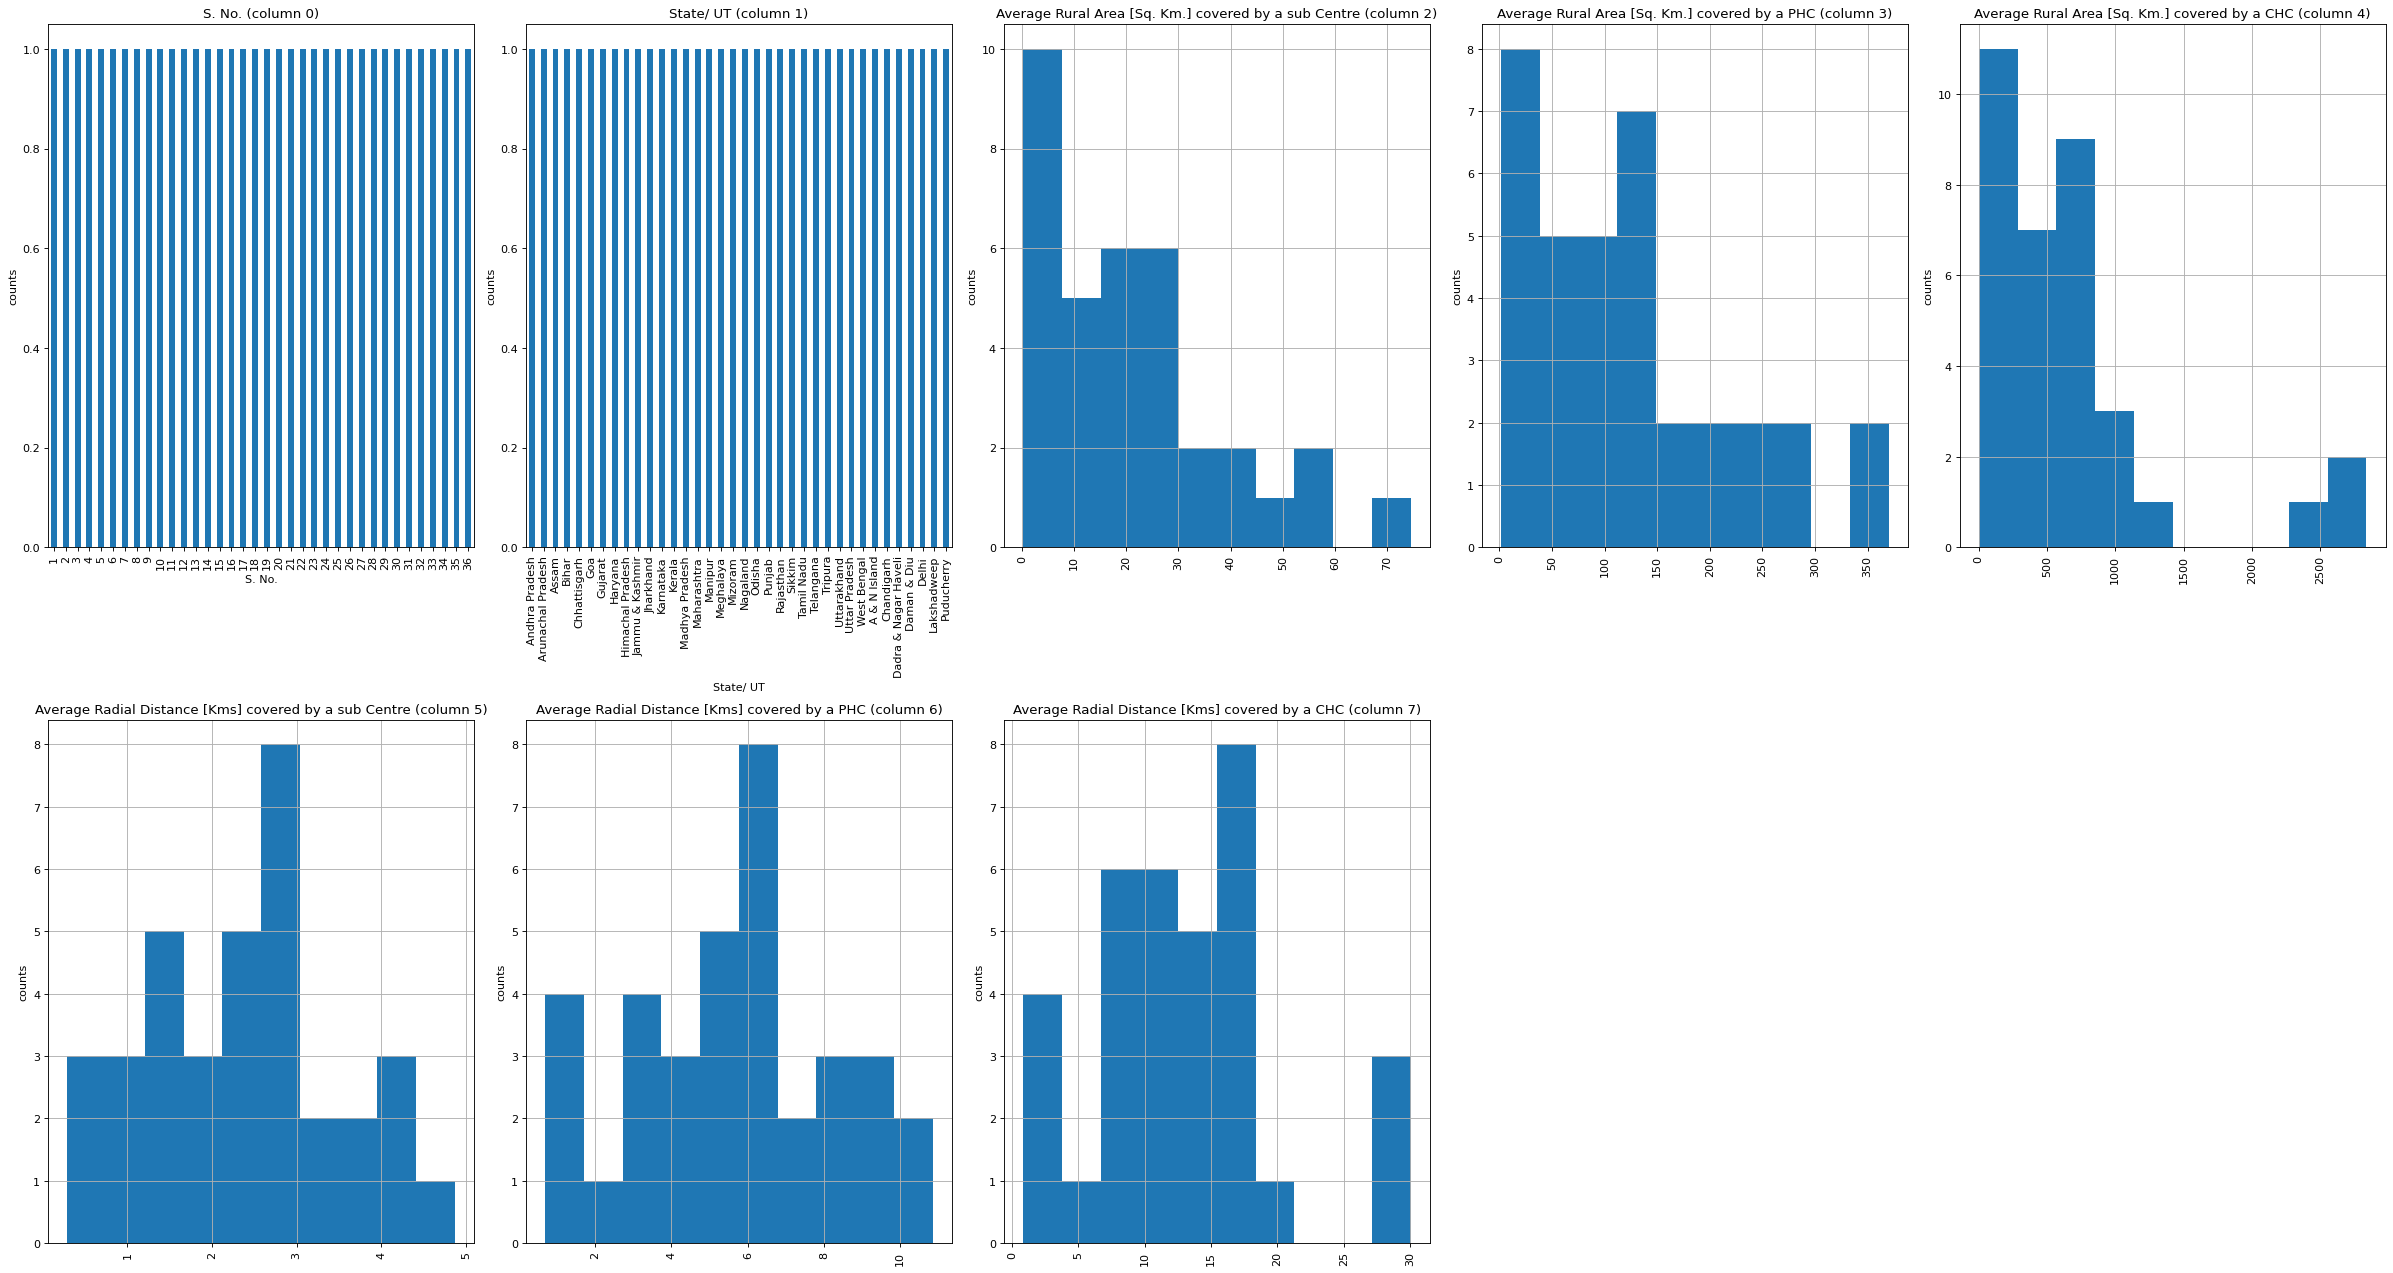

In [32]:
nunique = df4.nunique()
df_dist = df4[[col for col in df4 if nunique[col] > 1 and nunique[col] < 50]]
nRow, nCol = df_dist.shape
columnNames = list(df_dist)
nGraphPerRow = 5
nGraphShown = 10
nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
for i in range(min(nCol, nGraphShown)):
    plt.subplot(nGraphRow, nGraphPerRow, i + 1)
    columnDf = df_dist.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation=90)
    plt.title(f'{columnNames[i]} (column {i})')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.savefig('distribution_plot_geographic.png')
plt.show()

In [33]:
df_corr = df4.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
df_corr = df_corr[[col for col in df_corr if df_corr[col].nunique() > 1]]
if df_corr.shape[1] >= 2:
    corr = df_corr.corr()
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for Geographic Coverage', fontsize=15)
    plt.savefig('correlation_plot_geographic.png')
    plt.show()
else:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_corr.shape[1]}) is less than 2')

No correlation plots shown: The number of non-NaN or constant columns (0) is less than 2


In [34]:
# Filling NA with 0 for numerical columns
num_cols = ['Required - [R]', 'Sanctioned - [S]', 'In Position - [P]', 'Vacant - [S-P]', 'Shortfall - [R-P]']
df1[num_cols] = df1[num_cols].fillna(0)
df2[num_cols] = df2[num_cols].fillna(0)
df3[num_cols] = df3[num_cols].fillna(0)

# Verifying state alignment
assert all(df1['State/ UT'] == df2['State/ UT']) and all(df2['State/ UT'] == df3['State/ UT']), 'State/UT mismatch between datasets'

# Computing staffing metrics
data = pd.DataFrame({'State': df1['State/ UT']})
data['Doc_Shortfall_Pct'] = np.where(
    df1['Required - [R]'] > 0,
    (df1['Shortfall - [R-P]'] / df1['Required - [R]']) * 100,
    0
)
data['Doc_Vacancy_Pct'] = np.where(
    df1['Sanctioned - [S]'] > 0,
    (df1['Vacant - [S-P]'] / df1['Sanctioned - [S]']) * 100,
    np.nan
)
data['Doc_Staffing_Ratio'] = np.where(
    df1['Required - [R]'] > 0,
    (df1['In Position - [P]'] / df1['Required - [R]']) * 100,
    0
)
data['Nurse_Shortfall_Pct'] = np.where(
    df2['Required - [R]'] > 0,
    (df2['Shortfall - [R-P]'] / df2['Required - [R]']) * 100,
    0
)
data['Nurse_Vacancy_Pct'] = np.where(
    df2['Sanctioned - [S]'] > 0,
    (df2['Vacant - [S-P]'] / df2['Sanctioned - [S]']) * 100,
    np.nan
)
data['Nurse_Staffing_Ratio'] = np.where(
    df2['Required - [R]'] > 0,
    (df2['In Position - [P]'] / df2['Required - [R]']) * 100,
    0
)
data['Surgeon_Shortfall_Pct'] = np.where(
    df3['Required - [R]'] > 0,
    (df3['Shortfall - [R-P]'] / df3['Required - [R]']) * 100,
    0
)
data['Surgeon_Vacancy_Pct'] = np.where(
    df3['Sanctioned - [S]'] > 0,
    (df3['Vacant - [S-P]'] / df3['Sanctioned - [S]']) * 100,
    np.nan
)
data['Surgeon_Staffing_Ratio'] = np.where(
    df3['Required - [R]'] > 0,
    (df3['In Position - [P]'] / df3['Required - [R]']) * 100,
    0
)

# Adding geographic metric
data = data.merge(df4[['State/ UT', 'Average Rural Area [Sq. Km.] covered by a PHC']], 
                  left_on='State', right_on='State/ UT', how='left')
data.rename(columns={'Average Rural Area [Sq. Km.] covered by a PHC': 'PHC_Area_Covered'}, inplace=True)
data['PHC_Area_Covered'] = data['PHC_Area_Covered'].fillna(data['PHC_Area_Covered'].mean())

print('Processed Data Sample:')
print(data.head(5))

Processed Data Sample:
               State  Doc_Shortfall_Pct  Doc_Vacancy_Pct  Doc_Staffing_Ratio  \
0     Andhra Pradesh           0.000000        15.778689          143.330427   
1  Arunachal Pradesh          14.685315              NaN           85.314685   
2              Assam           0.000000              NaN          103.353057   
3              Bihar           5.950500        14.051973           94.049500   
4       Chhattisgarh          56.560510        57.268170           43.439490   

   Nurse_Shortfall_Pct  Nurse_Vacancy_Pct  Nurse_Staffing_Ratio  \
0             0.000000          17.785001            141.753403   
1            14.726027                NaN             85.273973   
2             0.000000           0.178699            131.745283   
3            61.275008          31.287605             38.724992   
4             2.540650          28.566108             97.459350   

   Surgeon_Shortfall_Pct  Surgeon_Vacancy_Pct  Surgeon_Staffing_Ratio  \
0              80.31

In [35]:
features = ['Doc_Shortfall_Pct', 'Doc_Vacancy_Pct', 'Doc_Staffing_Ratio',
            'Nurse_Shortfall_Pct', 'Nurse_Vacancy_Pct', 'Nurse_Staffing_Ratio',
            'Surgeon_Shortfall_Pct', 'Surgeon_Vacancy_Pct', 'Surgeon_Staffing_Ratio']
X = data[features].copy()
X.fillna({'Doc_Vacancy_Pct': 0, 'Nurse_Vacancy_Pct': 0, 'Surgeon_Vacancy_Pct': 0}, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_names = {
    0: 'Well-Staffed',
    1: 'Moderately Staffed',
    2: 'Understaffed',
    3: 'Critically Understaffed'
}
cluster_ratios = data.groupby('Cluster')['Doc_Staffing_Ratio'].mean().sort_values(ascending=False)
cluster_map = {cluster_ratios.index[i]: list(cluster_names.keys())[i] for i in range(4)}
data['Cluster_Name'] = data['Cluster'].map(cluster_map).map(cluster_names)

print('Clustered Data Sample:')
print(data.head(5))

Clustered Data Sample:
               State  Doc_Shortfall_Pct  Doc_Vacancy_Pct  Doc_Staffing_Ratio  \
0     Andhra Pradesh           0.000000        15.778689          143.330427   
1  Arunachal Pradesh          14.685315              NaN           85.314685   
2              Assam           0.000000              NaN          103.353057   
3              Bihar           5.950500        14.051973           94.049500   
4       Chhattisgarh          56.560510        57.268170           43.439490   

   Nurse_Shortfall_Pct  Nurse_Vacancy_Pct  Nurse_Staffing_Ratio  \
0             0.000000          17.785001            141.753403   
1            14.726027                NaN             85.273973   
2             0.000000           0.178699            131.745283   
3            61.275008          31.287605             38.724992   
4             2.540650          28.566108             97.459350   

   Surgeon_Shortfall_Pct  Surgeon_Vacancy_Pct  Surgeon_Staffing_Ratio  \
0              80.31

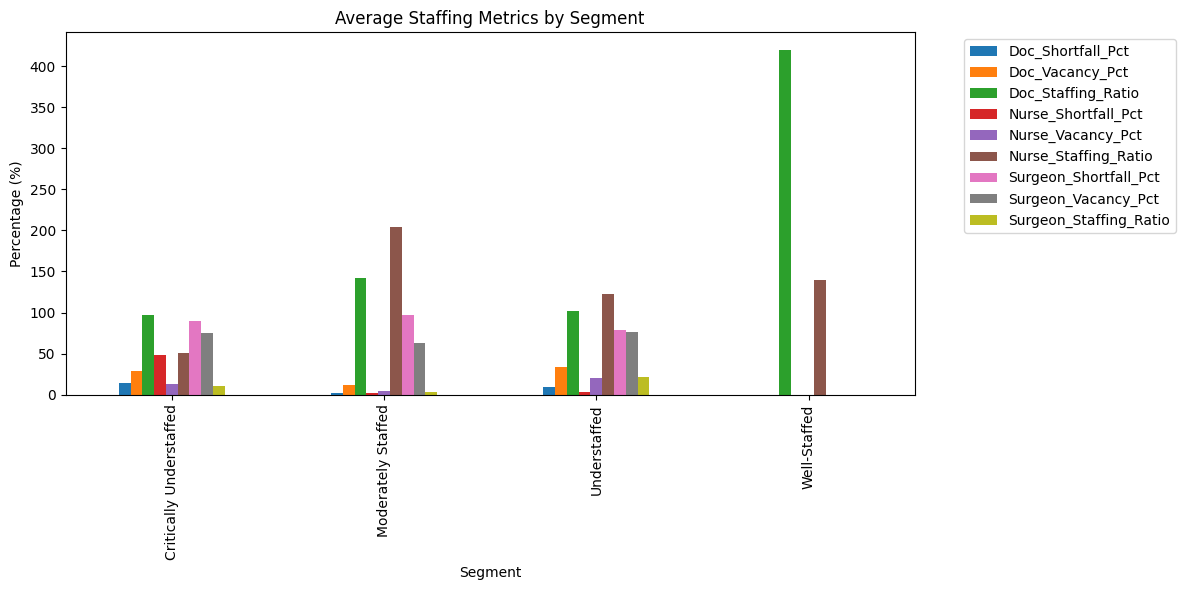

In [36]:
# Bar plot of segment metrics
segment_means = data.groupby('Cluster_Name')[features].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
segment_means.set_index('Cluster_Name')[features].plot(kind='bar', ax=ax)
plt.title('Average Staffing Metrics by Segment')
plt.xlabel('Segment')
plt.ylabel('Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('segment_bar_plot.png')
plt.show()

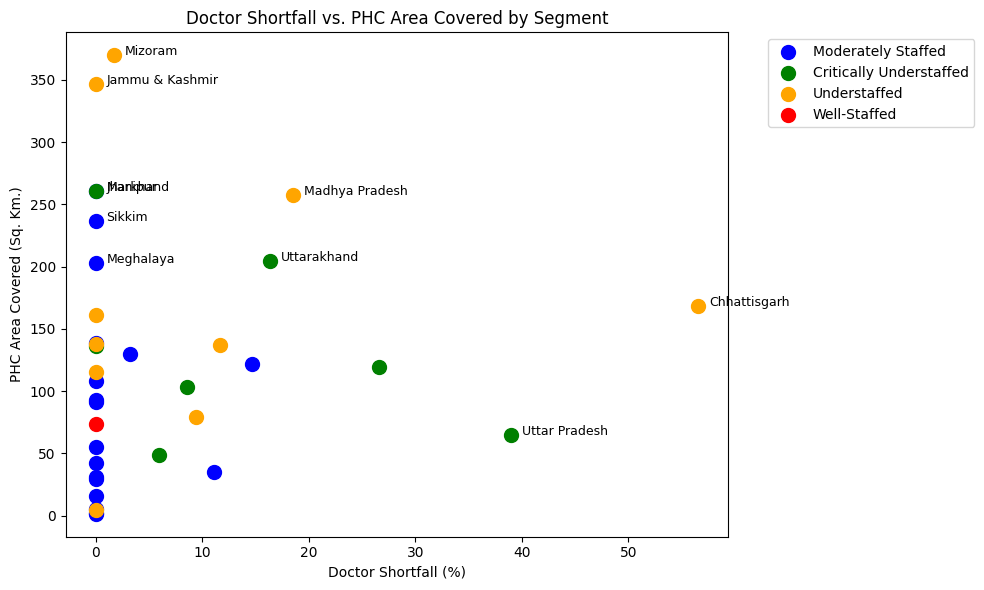

In [37]:
# Scatter plot of Doctor Shortfall vs. PHC Area Covered
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']
for i, cluster in enumerate(data['Cluster_Name'].unique()):
    cluster_data = data[data['Cluster_Name'] == cluster]
    plt.scatter(cluster_data['Doc_Shortfall_Pct'], cluster_data['PHC_Area_Covered'],
                c=colors[i], label=cluster, s=100)
for i, row in data.iterrows():
    if row['Doc_Shortfall_Pct'] > 30 or row['PHC_Area_Covered'] > 200:
        plt.text(row['Doc_Shortfall_Pct'] + 1, row['PHC_Area_Covered'], row['State'], fontsize=9)
plt.title('Doctor Shortfall vs. PHC Area Covered by Segment')
plt.xlabel('Doctor Shortfall (%)')
plt.ylabel('PHC Area Covered (Sq. Km.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('segment_scatter_plot.png')
plt.show()

In [38]:
imbalanced = data[
    ((data['Doc_Staffing_Ratio'] < 80) & (data['Nurse_Staffing_Ratio'] > 120)) |
    ((data['Surgeon_Staffing_Ratio'] < 20) & (data['Nurse_Staffing_Ratio'] > 100))
]
print('States with Imbalanced Staffing:')
if not imbalanced.empty:
    print(imbalanced[['State', 'Doc_Staffing_Ratio', 'Nurse_Staffing_Ratio', 'Surgeon_Staffing_Ratio']].to_string(index=False))
else:
    print('No states with significant staffing imbalances found.')

# Geographic disparity
high_coverage = data[data['PHC_Area_Covered'] > data['PHC_Area_Covered'].quantile(0.75)]
print('States with High PHC Area Coverage:')
print(high_coverage[['State', 'PHC_Area_Covered', 'Doc_Shortfall_Pct']].to_string(index=False))

States with Imbalanced Staffing:
               State  Doc_Staffing_Ratio  Nurse_Staffing_Ratio  Surgeon_Staffing_Ratio
      Andhra Pradesh          143.330427            141.753403               19.689119
               Assam          103.353057            131.745283                7.594937
             Haryana          117.213115            145.652174                1.785714
              Kerala          137.691402            160.493328                0.431034
             Manipur          228.235294            194.607843                0.000000
           Meghalaya          102.752294            204.697987                0.000000
             Mizoram           98.245614            176.666667                0.000000
            Nagaland           96.825397            141.758242                9.523810
          Tamil Nadu          202.569750            184.545230                0.519481
           Telangana          140.203193            128.043040               12.280702
          

In [39]:
for cluster in data['Cluster_Name'].unique():
    print(f'Segment: {cluster}')
    segment_data = data[data['Cluster_Name'] == cluster][['State'] + features + ['PHC_Area_Covered']]
    print(segment_data.to_string(index=False, float_format='%.1f'))

Segment: Moderately Staffed
               State  Doc_Shortfall_Pct  Doc_Vacancy_Pct  Doc_Staffing_Ratio  Nurse_Shortfall_Pct  Nurse_Vacancy_Pct  Nurse_Staffing_Ratio  Surgeon_Shortfall_Pct  Surgeon_Vacancy_Pct  Surgeon_Staffing_Ratio  PHC_Area_Covered
      Andhra Pradesh                0.0             15.8               143.3                  0.0               17.8                 141.8                   80.3                  0.0                    19.7             138.5
   Arunachal Pradesh               14.7              NaN                85.3                 14.7                NaN                  85.3                  100.0                  NaN                     0.0             121.9
               Assam                0.0              NaN               103.4                  0.0                0.2                 131.7                   92.4                  NaN                     7.6              31.2
                 Goa                0.0              0.0               2